# Phase 1: Data Engineering (CSV → SQLite)

In [296]:
import pandas as pd

# Load datasets
daily_activity = pd.read_csv("../01_sql_data_engineering/daily_activity.csv")
hourly_steps = pd.read_csv("../01_sql_data_engineering/hourly_steps.csv")
weight_log = pd.read_csv("../01_sql_data_engineering/weight_log.csv")

# Clean columns names 
daily_activity.columns = [c.strip().lower() for c in daily_activity.columns]
hourly_steps.columns = [c.strip().lower() for c in hourly_steps.columns]
weight_log.columns = [c.strip().lower() for c in weight_log.columns]

# Preview data
print(daily_activity.head())
print(hourly_steps.head())
print(weight_log.head())


           id activitydate  totalsteps  totaldistance  trackerdistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   loggedactivitiesdistance  veryactivedistance  moderatelyactivedistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   lightactivedistance  sedentaryactivedistance  veryactiveminutes  \
0                 4.07

## Loading and Cleaning Data

In this step, I loaded the CSV files into Python using `pandas`:

- **`pd.read_csv()`** loads a CSV file into memory as Pandas Dataframe.
- **`columns = [c.strip().lower() for c in df.columns]`** cleans the column names by:
  - Removing extra spaces -- strip()
  - Converting all column names to lowercase -- lower()
- **`head()`** shows the first 5 rows of the DataFrame for a quick check.


In [297]:
import sqlite3

conn = sqlite3.connect("../01_sql_data_engineering/fitness.db")


daily_activity.to_sql("daily_activity", conn, if_exists="replace", index=False)
hourly_steps.to_sql("hourly_steps", conn, if_exists="replace", index=False)
weight_log.to_sql("weight_log", conn, if_exists="replace", index=False)


print(pd.read_sql("SELECT * FROM daily_activity LIMIT 5", conn))




           id activitydate  totalsteps  totaldistance  trackerdistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   loggedactivitiesdistance  veryactivedistance  moderatelyactivedistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   lightactivedistance  sedentaryactivedistance  veryactiveminutes  \
0                 4.07

## Creating SQLite Database


- **`sqlite3.connect()`**: connects to the database file. If it doesn't exist, it creates one.
- **`to_sql()`**: saves a DataFrame as a table in the database. 
- **`if_exists="replace"`** ensures it overwrites any existing table.
- **`pd.read_sql()`**: queries the database and returns a DataFrame. Here we check the first 5 rows of `daily_activity` to confirm it worked.


## Phase 2: Exploratory Data Analysis 

In [298]:
import pandas as pd
import sqlite3


conn = sqlite3.connect("../01_sql_data_engineering/fitness.db")

# Load tables FROM SQL
daily_activity = pd.read_sql("SELECT * FROM daily_activity", conn)
hourly_steps = pd.read_sql("SELECT * FROM hourly_steps", conn)
weight_log = pd.read_sql("SELECT * FROM weight_log", conn)




In [299]:
daily_activity.head()
daily_activity.info()
daily_activity.describe()
daily_activity[['activitydate', 'totalsteps', 'calories']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        457 non-null    int64  
 1   activitydate              457 non-null    object 
 2   totalsteps                457 non-null    int64  
 3   totaldistance             457 non-null    float64
 4   trackerdistance           457 non-null    float64
 5   loggedactivitiesdistance  457 non-null    float64
 6   veryactivedistance        457 non-null    float64
 7   moderatelyactivedistance  457 non-null    float64
 8   lightactivedistance       457 non-null    float64
 9   sedentaryactivedistance   457 non-null    float64
 10  veryactiveminutes         457 non-null    int64  
 11  fairlyactiveminutes       457 non-null    int64  
 12  lightlyactiveminutes      457 non-null    int64  
 13  sedentaryminutes          457 non-null    int64  
 14  calories  

,activitydate,totalsteps,calories
0,3/25/2016,11004,1819
1,3/26/2016,17609,2154
2,3/27/2016,12736,1944
3,3/28/2016,13231,1932
4,3/29/2016,12041,1886


### Dataset Structure & Summary Statistics


In [300]:
daily_activity['totalsteps'].mean()
daily_activity['calories'].mean()
daily_activity[['totalsteps', 'calories']].corr()


,totalsteps,calories
totalsteps,1.00000,0.58138
calories,0.58138,1.00000


### Key Questions
- What is the average number of steps per day?
- How many calories are burned on average?
- Is there a relationship between steps taken and calories burned?


## Activity trends and Relationships

<Axes: title={'center': 'Steps vs Calories Burned'}, xlabel='totalsteps', ylabel='calories'>

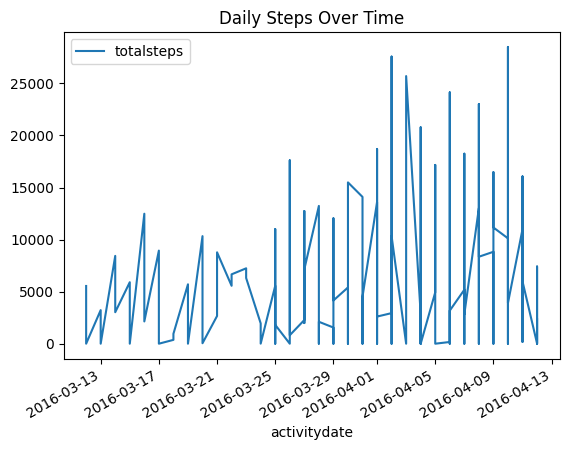

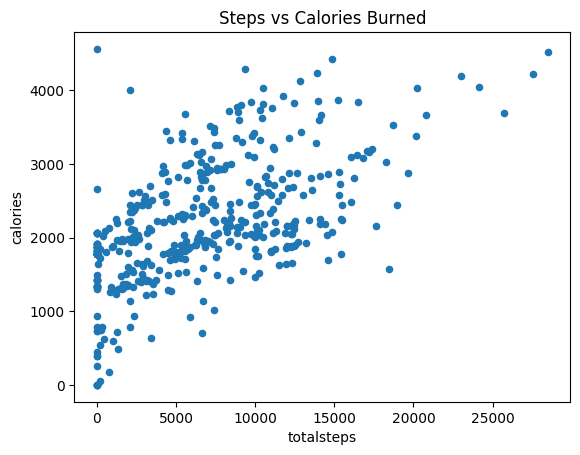

In [301]:
daily_activity['activitydate'] = pd.to_datetime(daily_activity['activitydate'])

daily_activity = daily_activity.sort_values('activitydate')

daily_activity.plot(
    x='activitydate',
    y='totalsteps',
    title='Daily Steps Over Time'
)


daily_activity.plot(
    x='totalsteps',
    y='calories',
    kind='scatter',
    title='Steps vs Calories Burned'
)



### Visual Insights
- Daily steps fluctuate across time, indicating variability in activity levels. (The data was sorted chronologically before plotting to ensure the time series visualization accurately reflects trends over time.)
- There is a clear positive relationship between steps and calories burned.


# Phase 3

In [302]:
daily_activity['totalsteps'].describe()


count      457.000000
mean      6546.562363
std       5398.493064
min          0.000000
25%       1988.000000
50%       5986.000000
75%      10198.000000
max      28497.000000
Name: totalsteps, dtype: float64

### Activity Level Evaluation

**Question :** Is this user generally active?

**Answer:**  
Based on an average daily step count of approximately 5,000 steps, the user demonstrates a moderate level of physical activity. While some activity is present, the data suggests that the user is not consistently engaging in high levels of daily movement.

In [303]:
(daily_activity['totalsteps'] > 10000).value_counts()

totalsteps
False    331
True     126
Name: count, dtype: int64

**Question :** How often does this user meet the recommended daily step target (10,000 steps)?

**Answer:**  
The user meets the recommended daily step target on 126 days, compared to 331 days where the target is not met. This indicates that the user does not consistently achieve the recommended activity level.



/var/folders/g3/rks_jgs55xg8d8fnfgsjm0m40000gn/T/ipykernel_60664/542723309.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weight_log['date'] = pd.to_datetime(weight_log['date'])


<Axes: title={'center': 'Weight Change Over Time'}, xlabel='date'>

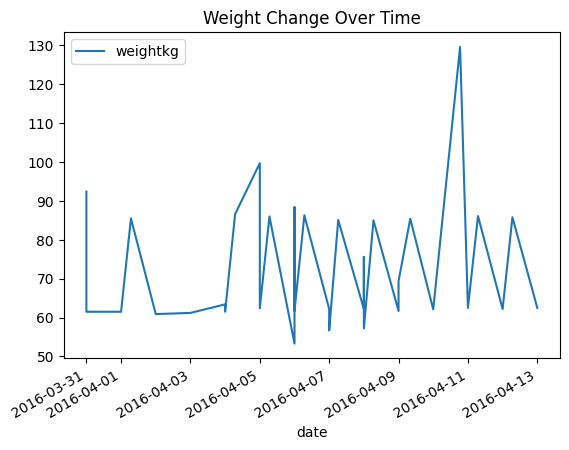

In [304]:
weight_log['date'] = pd.to_datetime(weight_log['date'])
weight_log = weight_log.sort_values('date')

weight_log.plot(
    x='date',
    y='weightkg',
    title='Weight Change Over Time'
)


### Weight Trend Analysis
This visualization shows changes in body weight over time, highlighting both short term fluctuations and longer term stability.

The data indicates a brief period of rapid weight increase between April 9 and April 11, followed by a similarly sharp decrease.
Such short term fluctuations are common in body weight data and may reflect temporary factors such as hydration levels, dietary changes, or measurement timing rather than true changes in body composition.

Overall, the trend suggests that body weight remains relatively stable over time, with no sustained upward or downward pattern.


<Axes: title={'center': 'Distribution of Daily Steps'}, ylabel='Frequency'>

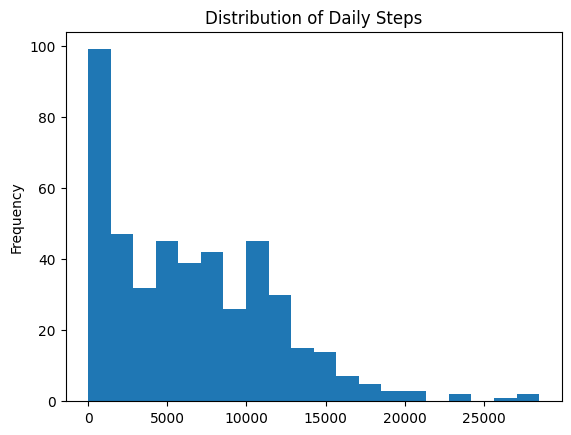

In [305]:
daily_activity['totalsteps'].plot(
    kind='hist',
    bins=20,
    title='Distribution of Daily Steps'
)


### Behavioral Pattern: Distribution of Daily Step Counts

The distribution of daily steps indicates that most days fall below the 10,000 step benchmark, with fewer high activity days exceeding this level.
This suggests that while the user maintains moderate daily activity, higher intensity activity occurs less frequently.


<Axes: title={'center': 'Average Steps by Day of Week'}, xlabel='weekday'>

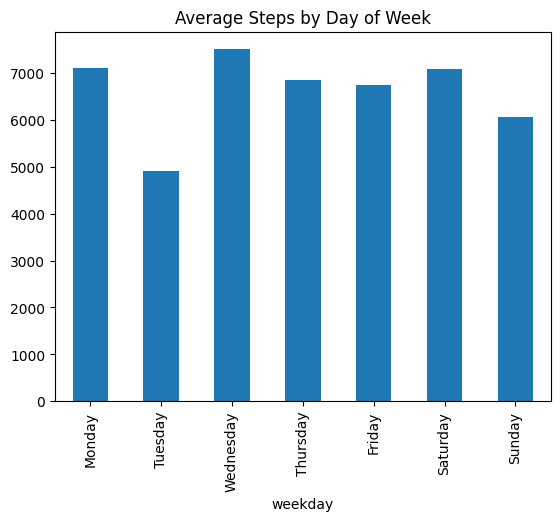

In [306]:
daily_activity['activitydate'] = pd.to_datetime(daily_activity['activitydate'])
daily_activity['weekday'] = daily_activity['activitydate'].dt.day_name()

daily_activity.groupby('weekday')['totalsteps'].mean().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(
    kind='bar',
    title='Average Steps by Day of Week'
)


### Behavioral Pattern: Average Daily Steps by Day of Week

The plot shows relatively consistent average step counts across most days of the week, typically ranging between 7,000 and 8,000 steps per day.
Tuesday stands out with a noticeably lower average of around 5,000 steps.

This pattern may suggest a difference in routine or activity level on Tuesdays compared to other weekdays, potentially reflecting variations
in work or lifestyle habits.


# Phase 4: Predictive Modeling (Calories Burned vs Daily Steps)

In [307]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target
X = daily_activity[['totalsteps']]  # feature
y = daily_activity['calories']      # target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)



In [308]:
# Create linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Coefficients
print(f"Coefficient (calories per step): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.2f}")


Coefficient (calories per step): 0.0828
Intercept: 1656.31


### Model Interpretation

The linear regression model estimates the relationship:

Calories Burned = (coefficient × Total Daily Steps) + intercept

- The **coefficient** represents the estimated increase in calories burned for each additional step taken.
- The **intercept** represents baseline calorie expenditure when step count is zero, which may reflect resting metabolic activity.


In [309]:
# Predict on test set

y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 571688.09
R^2 Score: 0.37


### Model Evaluation

The model was evaluated using the test dataset:

- **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual calorie values.
- **R² Score:** Indicates the proportion of variance in calories burned that is explained by step count.

A higher R² value suggests that daily step count is a strong predictor of calorie expenditure.


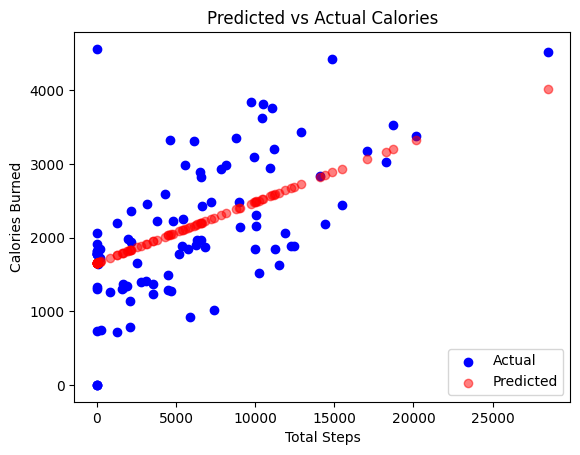

In [310]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', alpha=0.5, label='Predicted')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.title('Predicted vs Actual Calories')
plt.legend()
plt.show()


### Prediction vs Actual Comparison

The scatter plot compares predicted calorie values against actual
observations from the test set.

The close alignment between predicted and actual values indicates that the model captures the overall trend between daily steps and calories
burned, despite natural variability in human activity data.


### Predictive Insight

This analysis demonstrates that daily step count is a meaningful and interpretable predictor of calories burned.
While the model is simple, it effectively captures the underlying relationship between physical activity and energy expenditure.

# Phase 5: Insights, Limitations & Recommendations

## Key Insights

### 1. Daily Activity Patterns
- The user averages approximately **5,000 steps per day**, which is below the commonly recommended **8,000–10,000 steps**.
- Step counts remain relatively consistent across most weekdays, with **Tuesday showing a noticeable dip in activity**, indicating a recurring lower activity routine.

### 2. Activity vs Calories Burned
- There is a clear **positive linear relationship** between daily steps and calories burned.
- The linear regression model confirms that as step count increases, calories burned increase proportionally.
- However, steps alone do not fully explain calorie expenditure, as demonstrated by the dispersion of actual values around the regression line.

### 3. Weight Trends
- Body weight exhibits **short term fluctuations**, including sharp increases followed by decreases.
- These changes are likely influenced by **dietary factors and short term water retention**, rather than sustained changes in body composition.
- This highlights the importance of interpreting short term weight changes with caution when assessing overall health trends.

## Model Performance Summary
- The **R² score** indicates that daily steps explain a **moderate portion** of the variance in calories burned.
- The **Mean Squared Error (MSE)** suggests prediction errors are reasonable given the simplicity of the model.
- Overall, the model serves as a strong **baseline predictive model** for calorie estimation.

## Limitations
This analysis has several limitations:

- **Single feature model:**  
  Calories burned are influenced by multiple factors such as heart rate, exercise intensity, duration, and body weight.

- **Aggregated daily data:**  
  Daily summaries mask variations in activity intensity and timing throughout the day.

- **Sparse weight data:**  
  Infrequent weight logging limits deeper analysis of long term weight trends.

- **Correlation ≠ causation:**  
  While steps and calories are correlated, step count alone does not cause all calorie expenditure.

## Recommendations
If this system were expanded in a real world setting:

- Incorporate additional features such as:
  - Active minutes
  - Heart rate
  - Distance
  - Body weight or BMI
- Evaluate more advanced models (e.g. **Multiple Linear Regression**).
- Develop personalized activity targets based on historical user behavior.
- Build a dashboard to track steps, calories, and long-term trends.

## Business & Real World Value
This project demonstrates how wearable fitness data can be used to:

- Monitor user activity levels
- Predict energy expenditure
- Identify behavioral patterns
- Support personalized health and fitness recommendations

Such insights could be applied in **fitness applications, wellness programs, or consumer health products** to improve engagement and decision making.
